In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import pandas as pd
import matplotlib.patches as mpatches
import xml.etree.ElementTree as ET  
from xml.etree.ElementTree import parse

# Load data 

In [3]:
image_path = "/mnt/d/Data/od_tutorial/images/"
label_path = "/mnt/d/Data/od_tutorial/annotations/"

## make path for download

In [20]:
img_paths = sorted([os.path.join(image_path, fname) for fname in os.listdir(image_path) if fname.endswith(".jpg")])
label_paths = sorted([os.path.join(label_path, fname) for fname in os.listdir(label_path) if fname.endswith(".xml")])

## make bounding box labels

In [21]:
k = len(img_paths)
data_list=[]

for i in range(k):  
    annotation_file=label_paths[i]
    tree = parse(annotation_file)
    root = tree.getroot()

    # Iterating over each object elements
    for object in ds.iter("object"):
        
        x_min = int(object.find('bndbox').findtext('xmin'))
        y_min = int(object.find('bndbox').findtext('ymin'))
        x_max = int(object.find('bndbox').findtext('xmax'))
        y_max = int(object.find('bndbox').findtext('ymax'))
        
        # in case the boundary goes above its limis, providing some restrictions.
        if x_min >= x_max or y_min >= y_max:
            continue
        elif x_max <= x_min or y_max <= y_min:
            continue
        
        sample = [str(img_paths[i]), x_min, y_min, x_max, y_max]
        
        data_list.append(sample)
        
data = pd.DataFrame(data_list)

In [24]:
data.head(5)

,0,1,2,3,4
0,/mnt/d/Data/od_tutorial/images/a (1).jpg,38,54,179,173
1,/mnt/d/Data/od_tutorial/images/a (10).jpg,38,54,179,173
2,/mnt/d/Data/od_tutorial/images/a (100).jpg,38,54,179,173
3,/mnt/d/Data/od_tutorial/images/a (101).jpg,38,54,179,173
4,/mnt/d/Data/od_tutorial/images/a (102).jpg,38,54,179,173


## visualize bbox

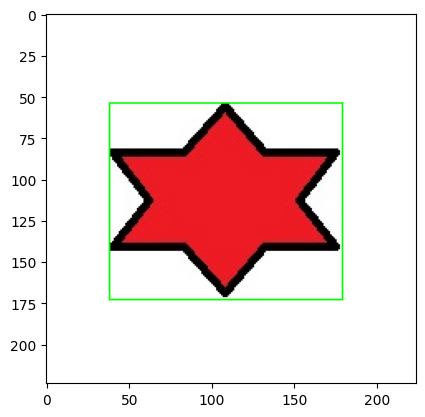

In [29]:
img = plt.imread(data[0][0])
cv2.rectangle(img,(data[1][0], data[2][0]),(data[3][0], data[4][0]), (0,255,0))
plt.imshow(img)

## load images

In [51]:
def proc_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float64)
    return image/255.0

In [52]:
def proc_image_cv2(path):
    image = cv2.imread(path)
    image = np.float32(image)
    return image/255.0

using tf.io_read_file instead cv2.imread  
It make possible to us GPU for read image

In [63]:
image_dataset = []
for img in img_paths:
    image_dataset.append(proc_image(img))

In [64]:
image_dataset = []
for img in img_paths:
    image_dataset.append(proc_image_cv2(img))